In [46]:
import torch
import torch.nn as nn
from torchvision.models import resnet34
from torchvision.datasets import CIFAR10
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from tqdm.auto import trange, tqdm
import pandas as pd
from sklearn.metrics import accuracy_score
from google.colab import drive 

In [47]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
class RotationDataset(Dataset):
    def __init__(self,train=True):
        self.ds = CIFAR10(".",download=True,train=train)
        self.Tens = transforms.ToTensor()
    def __len__(self):
        return(len(self.ds))
    def __getitem__(self,idx):
        X = self.ds[idx][0]
        X_90 = X.rotate(90)
        X_180 = X.rotate(180)
        X_270 = X.rotate(270)
        
        
        return (self.Tens(X), self.Tens(X_90)
                , self.Tens(X_180), self.Tens(X_270)),(torch.tensor(0),torch.tensor(1)
                                                       ,torch.tensor(2),torch.tensor(3))
    

In [49]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [50]:
train_set=RotationDataset()
val_set = RotationDataset(train=False)
train_loader = DataLoader(train_set,batch_size=64//4,shuffle=True)
val_loader = DataLoader(val_set,batch_size=64//4,shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


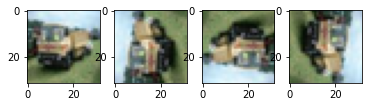

In [51]:
#print(dataiter.next()[0][0].shape)
#print(dataiter.next()[0][0][0].shape)
x =iter(train_loader).next()[0]
plt.subplot(1, 4, 1)
plt.imshow(x[0][0].permute(1, 2, 0))
plt.subplot(1, 4, 2)
plt.imshow(x[1][0].permute(1, 2, 0))
plt.subplot(1, 4, 3)
plt.imshow(x[2][0].permute(1, 2, 0))
plt.subplot(1, 4, 4)
plt.imshow(x[3][0].permute(1, 2, 0))
plt.show()


In [52]:
def unifier(X,y):
    X= torch.concat(X)
    y= torch.concat(y)
    idx=np.random.permutation(len(y))
    
    return X[idx],y[idx]

In [53]:
model = resnet34(pretrained=False)
model.fc=nn.Linear(512,4)
model = model.to(device)

In [54]:
optimizer = torch.optim.SGD(model.parameters(),lr=1e-4)
loss_fn = nn.CrossEntropyLoss()
epochs = 50


In [55]:
def save_checkpoint(state, filename="my_checkpoint.pth.tar"):
    model_save_name = filename
    path = F"/content/drive/My Drive/{model_save_name}" 
    print("=> Saving checkpoint")
    torch.save(state, path)


def load_checkpoint(checkpoint,model,optimizer):
    print("=> Loading checkpoint")
    model.load_state_dict(checkpoint["state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer"])
    iter_train_loss = checkpoint["iter_train_loss"]
    iter_val_loss = checkpoint["iter_val_loss"]

In [56]:
load_model = False
if load_model :
  model_save_name ="my_checkpoint.pth.tar"
  path = F"/content/drive/My Drive/{model_save_name}" 
  load_checkpoint(torch.load(path),model,optimizer)

In [57]:
train_loss = []
val_loss = []

for epoch in range(epochs):
  
  model.train()
  

  if epoch % 5 == 1:
    checkpoint = {'state_dict' : model.state_dict(), 'optimizer' : optimizer.state_dict(),
                  'iter_train_loss' : iter_train_loss ,'iter_val_loss' : iter_val_loss 
                  }
    save_checkpoint(checkpoint, filename="my_checkpoint.pth.tar")

  iter_train_loss = 0
  iter_val_loss=0

  for X,y in train_loader:

    optimizer.zero_grad()        
    X,y= unifier(X,y)
    X = X.to(device)
    y = y.to(device)
    out = model(X)
    loss = loss_fn(out,y)
    loss.backward()
    optimizer.step()
    loss = loss.item()
    iter_train_loss += loss
    
  

  train_loss.append(iter_train_loss/len(train_set))
  print("Epoch: {0} \t Loss: {1:.4f} ".format(epoch, iter_train_loss/len(train_set)))
  with torch.no_grad():
    model.eval()
    
    for X,y in val_loader:
      X,y= unifier(X,y)
      X = X.to(device)
      y = y.to(device)
      out = model(X)
      loss = loss_fn(out,y)
      loss = loss.item()
      iter_val_loss +=loss
    val_loss.append(iter_val_loss/len(val_set))


Epoch: 0 	 Loss: 0.0867 
=> Saving checkpoint
Epoch: 1 	 Loss: 0.0788 
Epoch: 2 	 Loss: 0.0746 
Epoch: 3 	 Loss: 0.0720 
Epoch: 4 	 Loss: 0.0702 
Epoch: 5 	 Loss: 0.0689 
=> Saving checkpoint
Epoch: 6 	 Loss: 0.0677 
Epoch: 7 	 Loss: 0.0667 
Epoch: 8 	 Loss: 0.0658 
Epoch: 9 	 Loss: 0.0651 
Epoch: 10 	 Loss: 0.0643 
=> Saving checkpoint
Epoch: 11 	 Loss: 0.0637 
Epoch: 12 	 Loss: 0.0631 
Epoch: 13 	 Loss: 0.0625 
Epoch: 14 	 Loss: 0.0620 
Epoch: 15 	 Loss: 0.0614 
=> Saving checkpoint
Epoch: 16 	 Loss: 0.0610 
Epoch: 17 	 Loss: 0.0606 
Epoch: 18 	 Loss: 0.0600 
Epoch: 19 	 Loss: 0.0597 
Epoch: 20 	 Loss: 0.0593 
=> Saving checkpoint
Epoch: 21 	 Loss: 0.0588 
Epoch: 22 	 Loss: 0.0584 
Epoch: 23 	 Loss: 0.0581 
Epoch: 24 	 Loss: 0.0578 
Epoch: 25 	 Loss: 0.0573 
=> Saving checkpoint
Epoch: 26 	 Loss: 0.0570 
Epoch: 27 	 Loss: 0.0567 
Epoch: 28 	 Loss: 0.0565 
Epoch: 29 	 Loss: 0.0561 
Epoch: 30 	 Loss: 0.0557 
=> Saving checkpoint
Epoch: 31 	 Loss: 0.0554 
Epoch: 32 	 Loss: 0.0552 
Epoch

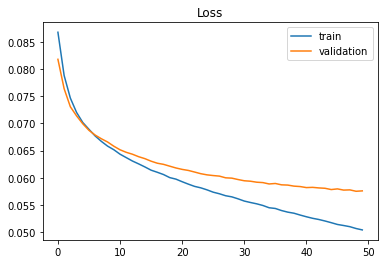

In [58]:
plt.plot(train_loss,label='train')
plt.plot(val_loss,label='validation')
plt.legend()
plt.title("Loss")
plt.show()

# stage 4

In [59]:
for param in model.parameters():
    param.requires_grad = False

In [60]:
stage4=nn.Sequential(model.conv1,model.bn1,model.relu,model.maxpool,model.layer1,model.layer2
                     ,model.layer3,model.layer4,nn.Flatten(),nn.Linear(512,10)).to(device)

In [61]:
clf_train_set=CIFAR10(".",transform=transforms.ToTensor())
clf_val_set=CIFAR10(".",train=False,transform=transforms.ToTensor())
clf_train_loader = DataLoader(clf_train_set,batch_size=64,shuffle=True)
clf_val_loader = DataLoader(clf_val_set,batch_size=64,shuffle=True)

In [62]:
optimizer = torch.optim.SGD(stage4.parameters(),lr=1e-4)
loss_fn = nn.CrossEntropyLoss()
epochs = 50

In [63]:
train_loss = []
val_loss = []
train_acc = []
val_acc = []
for epoch in range(epochs):
  stage4.train()
  iter_loss = 0
  count_corr = 0
  total_corr = 0
  for X,y in clf_train_loader:

    optimizer.zero_grad()        
    X = X.to(device)
    y = y.to(device)
    out = stage4(X)
    loss = loss_fn(out,y)
    loss.backward()
    optimizer.step()
    loss = loss.item()
    iter_loss += loss
    pre = torch.argmax(out,dim=1)
    count_corr = (pre == y).sum().item()
    total_corr += count_corr
    

  train_acc.append(total_corr*100/len(clf_train_set))
  train_loss.append(iter_loss/len(clf_train_set))
  print("Epoch: {0} \t Loss: {1:.4f} \t Accuracy: {2:.1f} ".format(epoch,train_loss[-1] ,train_acc[-1]))


  with torch.no_grad():
    model.eval()
    iter_loss=0
    count_corr = 0
    for X,y in clf_val_loader:
      X = X.to(device)
      y = y.to(device)
      out = stage4(X)
      loss = loss_fn(out,y)
      loss = loss.item()
      iter_loss +=loss
      pre = torch.argmax(out,dim=1)
      count_corr += (pre == y).sum().item()

      
    val_loss.append(iter_loss/len(clf_val_set))
    val_acc.append(count_corr*100/len(clf_val_set))
    


Epoch: 0 	 Loss: 0.0378 	 Accuracy: 13.1 
Epoch: 1 	 Loss: 0.0353 	 Accuracy: 16.6 
Epoch: 2 	 Loss: 0.0343 	 Accuracy: 19.1 
Epoch: 3 	 Loss: 0.0336 	 Accuracy: 20.3 
Epoch: 4 	 Loss: 0.0331 	 Accuracy: 21.6 
Epoch: 5 	 Loss: 0.0327 	 Accuracy: 22.8 
Epoch: 6 	 Loss: 0.0325 	 Accuracy: 23.5 
Epoch: 7 	 Loss: 0.0322 	 Accuracy: 24.2 
Epoch: 8 	 Loss: 0.0319 	 Accuracy: 25.1 
Epoch: 9 	 Loss: 0.0318 	 Accuracy: 25.1 
Epoch: 10 	 Loss: 0.0315 	 Accuracy: 26.1 
Epoch: 11 	 Loss: 0.0314 	 Accuracy: 26.6 
Epoch: 12 	 Loss: 0.0312 	 Accuracy: 26.7 
Epoch: 13 	 Loss: 0.0311 	 Accuracy: 27.1 
Epoch: 14 	 Loss: 0.0310 	 Accuracy: 27.4 
Epoch: 15 	 Loss: 0.0309 	 Accuracy: 27.7 
Epoch: 16 	 Loss: 0.0307 	 Accuracy: 28.3 
Epoch: 17 	 Loss: 0.0306 	 Accuracy: 28.4 
Epoch: 18 	 Loss: 0.0305 	 Accuracy: 28.6 
Epoch: 19 	 Loss: 0.0305 	 Accuracy: 28.6 
Epoch: 20 	 Loss: 0.0304 	 Accuracy: 29.0 
Epoch: 21 	 Loss: 0.0303 	 Accuracy: 29.3 
Epoch: 22 	 Loss: 0.0302 	 Accuracy: 29.5 
Epoch: 23 	 Loss: 0.0

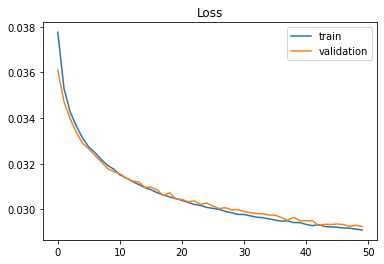

In [64]:
plt.plot(train_loss,label='train')
plt.plot(val_loss,label='validation')
plt.legend()
plt.title("Loss")
plt.show()

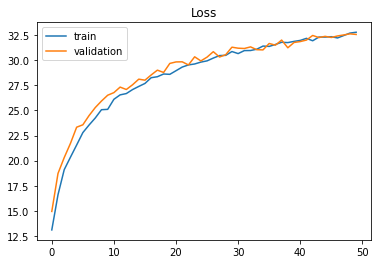

In [65]:
plt.plot(train_acc,label='train')
plt.plot(val_acc,label='validation')
plt.legend()
plt.title("Loss")
plt.show()

# stage 3

In [69]:
for param in model.parameters():
    param.requires_grad = False

stage3=nn.Sequential(model.conv1,model.bn1,model.relu,model.maxpool,model.layer1,model.layer2
                     ,model.layer3,nn.MaxPool2d(kernel_size=2),nn.Flatten(),nn.Linear(256,10)).to(device)

optimizer = torch.optim.SGD(stage3.parameters(),lr=1e-4)
loss_fn = nn.CrossEntropyLoss()
epochs = 50

In [70]:
train_loss = []
val_loss = []
train_acc = []
val_acc = []
for epoch in range(epochs):
  stage3.train()
  iter_loss = 0
  count_corr = 0
  total_corr = 0
  for X,y in clf_train_loader:

    optimizer.zero_grad()        
    X = X.to(device)
    y = y.to(device)
    out = stage3(X)
    loss = loss_fn(out,y)
    loss.backward()
    optimizer.step()
    loss = loss.item()
    iter_loss += loss
    pre = torch.argmax(out,dim=1)
    count_corr = (pre == y).sum().item()
    total_corr += count_corr
    

  train_acc.append(total_corr*100/len(clf_train_set))
  train_loss.append(iter_loss/len(clf_train_set))
  print("Epoch: {0} \t Loss: {1:.4f} \t Accuracy: {2:.1f} ".format(epoch,train_loss[-1] ,train_acc[-1]))


  with torch.no_grad():
    model.eval()
    iter_loss=0
    count_corr = 0
    for X,y in clf_val_loader:
      X = X.to(device)
      y = y.to(device)
      out = stage3(X)
      loss = loss_fn(out,y)
      loss = loss.item()
      iter_loss +=loss
      pre = torch.argmax(out,dim=1)
      count_corr += (pre == y).sum().item()

      
    val_loss.append(iter_loss/len(clf_val_set))
    val_acc.append(count_corr*100/len(clf_val_set))
    


Epoch: 0 	 Loss: 0.0383 	 Accuracy: 13.3 
Epoch: 1 	 Loss: 0.0359 	 Accuracy: 16.8 
Epoch: 2 	 Loss: 0.0348 	 Accuracy: 18.9 
Epoch: 3 	 Loss: 0.0342 	 Accuracy: 20.3 
Epoch: 4 	 Loss: 0.0336 	 Accuracy: 21.6 
Epoch: 5 	 Loss: 0.0332 	 Accuracy: 22.7 
Epoch: 6 	 Loss: 0.0328 	 Accuracy: 23.5 
Epoch: 7 	 Loss: 0.0325 	 Accuracy: 24.2 
Epoch: 8 	 Loss: 0.0322 	 Accuracy: 24.9 
Epoch: 9 	 Loss: 0.0319 	 Accuracy: 25.5 
Epoch: 10 	 Loss: 0.0317 	 Accuracy: 26.3 
Epoch: 11 	 Loss: 0.0315 	 Accuracy: 26.8 
Epoch: 12 	 Loss: 0.0313 	 Accuracy: 27.3 
Epoch: 13 	 Loss: 0.0311 	 Accuracy: 27.7 
Epoch: 14 	 Loss: 0.0310 	 Accuracy: 28.0 
Epoch: 15 	 Loss: 0.0308 	 Accuracy: 28.4 
Epoch: 16 	 Loss: 0.0307 	 Accuracy: 28.9 
Epoch: 17 	 Loss: 0.0306 	 Accuracy: 29.1 
Epoch: 18 	 Loss: 0.0304 	 Accuracy: 29.4 
Epoch: 19 	 Loss: 0.0303 	 Accuracy: 29.5 
Epoch: 20 	 Loss: 0.0302 	 Accuracy: 30.1 
Epoch: 21 	 Loss: 0.0301 	 Accuracy: 30.2 
Epoch: 22 	 Loss: 0.0300 	 Accuracy: 30.2 
Epoch: 23 	 Loss: 0.0

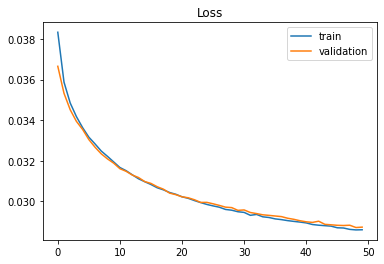

In [71]:
plt.plot(train_loss,label='train')
plt.plot(val_loss,label='validation')
plt.legend()
plt.title("Loss")
plt.show()

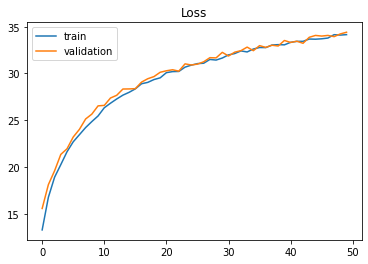

In [72]:
plt.plot(train_acc,label='train')
plt.plot(val_acc,label='validation')
plt.legend()
plt.title("Loss")
plt.show()

# stage 2

In [73]:
for param in model.parameters():
    param.requires_grad = False

stage2=nn.Sequential(model.conv1,model.bn1,model.relu,model.maxpool,model.layer1,model.layer2
                     ,nn.MaxPool2d(kernel_size=2),nn.Flatten(),nn.Linear(512,10)).to(device)

optimizer = torch.optim.SGD(stage2.parameters(),lr=1e-4)
loss_fn = nn.CrossEntropyLoss()
epochs = 50

In [74]:
train_loss = []
val_loss = []
train_acc = []
val_acc = []
for epoch in range(epochs):
  stage2.train()
  iter_loss = 0
  count_corr = 0
  total_corr = 0
  for X,y in clf_train_loader:

    optimizer.zero_grad()        
    X = X.to(device)
    y = y.to(device)
    out = stage2(X)
    loss = loss_fn(out,y)
    loss.backward()
    optimizer.step()
    loss = loss.item()
    iter_loss += loss
    pre = torch.argmax(out,dim=1)
    count_corr = (pre == y).sum().item()
    total_corr += count_corr
    

  train_acc.append(total_corr*100/len(clf_train_set))
  train_loss.append(iter_loss/len(clf_train_set))
  print("Epoch: {0} \t Loss: {1:.4f} \t Accuracy: {2:.1f} ".format(epoch,train_loss[-1] ,train_acc[-1]))


  with torch.no_grad():
    model.eval()
    iter_loss=0
    count_corr = 0
    for X,y in clf_val_loader:
      X = X.to(device)
      y = y.to(device)
      out = stage2(X)
      loss = loss_fn(out,y)
      loss = loss.item()
      iter_loss +=loss
      pre = torch.argmax(out,dim=1)
      count_corr += (pre == y).sum().item()

      
    val_loss.append(iter_loss/len(clf_val_set))
    val_acc.append(count_corr*100/len(clf_val_set))
    


Epoch: 0 	 Loss: 0.0366 	 Accuracy: 14.2 
Epoch: 1 	 Loss: 0.0338 	 Accuracy: 20.3 
Epoch: 2 	 Loss: 0.0327 	 Accuracy: 23.3 
Epoch: 3 	 Loss: 0.0319 	 Accuracy: 25.3 
Epoch: 4 	 Loss: 0.0313 	 Accuracy: 26.9 
Epoch: 5 	 Loss: 0.0307 	 Accuracy: 28.5 
Epoch: 6 	 Loss: 0.0303 	 Accuracy: 29.7 
Epoch: 7 	 Loss: 0.0299 	 Accuracy: 30.7 
Epoch: 8 	 Loss: 0.0295 	 Accuracy: 31.6 
Epoch: 9 	 Loss: 0.0292 	 Accuracy: 32.3 
Epoch: 10 	 Loss: 0.0290 	 Accuracy: 32.9 
Epoch: 11 	 Loss: 0.0287 	 Accuracy: 33.5 
Epoch: 12 	 Loss: 0.0285 	 Accuracy: 34.2 
Epoch: 13 	 Loss: 0.0283 	 Accuracy: 34.6 
Epoch: 14 	 Loss: 0.0281 	 Accuracy: 35.3 
Epoch: 15 	 Loss: 0.0279 	 Accuracy: 35.7 
Epoch: 16 	 Loss: 0.0278 	 Accuracy: 36.0 
Epoch: 17 	 Loss: 0.0276 	 Accuracy: 36.6 
Epoch: 18 	 Loss: 0.0275 	 Accuracy: 36.8 
Epoch: 19 	 Loss: 0.0274 	 Accuracy: 37.1 
Epoch: 20 	 Loss: 0.0273 	 Accuracy: 37.5 
Epoch: 21 	 Loss: 0.0271 	 Accuracy: 37.7 
Epoch: 22 	 Loss: 0.0270 	 Accuracy: 38.2 
Epoch: 23 	 Loss: 0.0

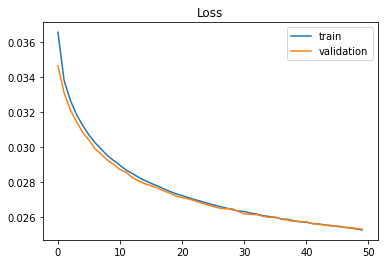

In [75]:
plt.plot(train_loss,label='train')
plt.plot(val_loss,label='validation')
plt.legend()
plt.title("Loss")
plt.show()


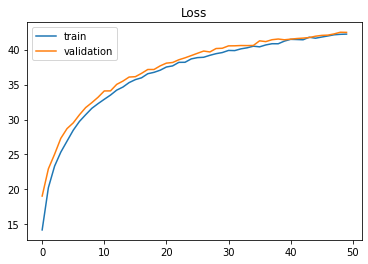

In [76]:
plt.plot(train_acc,label='train')
plt.plot(val_acc,label='validation')
plt.legend()
plt.title("Loss")
plt.show()